# CS412 - Machine Learning - 2020

# Homework 2

100 pts

# Goal

The goal of this homework is to get familiar feature handling and cross validation.


# Dataset

German Credit Risk dataset, prepared by Prof. Hoffman, classifies each person as having a good or bad credit risk. The dataset that we use consists of both numerical and categorical features.



# Task

Build a k-NN classifier with scikit-learn library to classify people as bad or good risks for the german credit dataset. 

# Software

Documentation for the necessary functions can be accessed from the link below.

[http://scikit-learn.org/stable/supervised_learning.html](http://scikit-learn.org/stable/supervised_learning.html)

# Submission

Follow the instructions at the end.


# 1) Initialize

First, make a copy of this notebook in your drive

In [ ]:
# Mount to your drive, in this way you can reach files that are in your drive
# Run this cell
# Go through the link that will be showed below
# Select your google drive account and copy authorization code and paste here in output and press enter
# You can also follow the steps from that link
# https://medium.com/ml-book/simplest-way-to-open-files-from-google-drive-in-google-colab-fae14810674 

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 2) Load Dataset

To start working for your homework, take a copy of the folder, given in the below link to your own google drive. You find the train and test data under this folder.

[https://drive.google.com/drive/folders/1DbW6VxLKZv2oqFn9SwxAnVadmn1_nPXi?usp=sharing](https://drive.google.com/drive/folders/1DbW6VxLKZv2oqFn9SwxAnVadmn1_nPXi?usp=sharing)

After copy the folder, copy the path of the train and test dataset to paste them in the below cell to load your data.


In [ ]:
import pandas as pd
from os.path import join
path_prefix = "/content/drive/My Drive"

train_df = pd.read_csv(join(path_prefix, 'german_credit_train.csv'))

test_df = pd.read_csv(join(path_prefix, 'german_credit_test.csv'))

# 3) Optional - Analyze the Dataset 

You can use the functions of the pandas library to analyze your train dataset in detail - **this part is OPTIONAL - look around the data as you wish**.


*   Display the number of instances and features in the train ***(shape function can be used)**
*   Display 5 random examples from the train ***(sample function can be used)**
*   Display the information about each features ***(info method can be used)**



In [ ]:
# Print shape
print("Train data dimensionality: ", )
print(train_df.shape)
# Print random 5 rows
print("Examples from train data: ")
train_df.head(5)

Train data dimensionality: 
(800, 13)
Examples from train data: 


,AccountStatus,Duration,CreditHistory,CreditAmount,SavingsAccount,EmploymentSince,PercentOfIncome,PersonalStatus,Property,Age,OtherInstallPlans,Housing,Risk
0,A14,12,A32,2859,A65,A71,4,A93,A124,38,A143,A152,1
1,A11,9,A32,2136,A61,A73,3,A93,A121,25,A143,A152,1
2,A11,18,A34,5302,A61,A75,2,A93,A124,36,A143,A153,1
3,A11,14,A32,8978,A61,A75,1,A91,A122,45,A143,A152,2
4,A14,15,A32,4623,A62,A73,3,A93,A122,40,A143,A152,2


In [ ]:
# Print the information about the dataset
print("Information about train data ", )
train_df.describe()

Information about train data 


,Duration,CreditAmount,PercentOfIncome,Age,Risk
count,800.000000,800.000000,800.000000,800.00000,800.000000
mean,20.798750,3262.982500,2.961250,35.76875,1.290000
std,12.156911,2811.138736,1.119739,11.54109,0.454046
min,4.000000,250.000000,1.000000,19.00000,1.000000
25%,12.000000,1373.500000,2.000000,27.00000,1.000000
50%,18.000000,2321.500000,3.000000,33.00000,1.000000
75%,24.000000,3972.250000,4.000000,42.00000,2.000000
max,72.000000,18424.000000,4.000000,75.00000,2.000000


# 4) Define your train and test labels

*  Define labels for both train and test data in new arrays 
*  And remove the label column from both train and test sets do tht it is not used as a feature! 


(**you can use pop method**)


In [ ]:
# Define labels

train_label = train_df.pop('Risk')
test_label = test_df.pop('Risk')

# 5) Handle missing values if any 

*   Print the columns that have **NaN** values (**isnull** method can be used)
*   You can impute missing values with mode of that feature or remove samples or attributes
*   To impute the test set, you should use the mode values that you obtain from **train** set, as **you should not be looking at your test data to gain any information or advantage.**



In [ ]:
# Print columns with NaN values
print(train_df.isna().any())
print("                   ")
print(test_df.isna().any())

AccountStatus        False
Duration             False
CreditHistory        False
CreditAmount         False
SavingsAccount       False
EmploymentSince      False
PercentOfIncome      False
PersonalStatus       False
Property             False
Age                  False
OtherInstallPlans    False
Housing               True
dtype: bool
                   
AccountStatus        False
Duration             False
CreditHistory        False
CreditAmount         False
SavingsAccount       False
EmploymentSince      False
PercentOfIncome      False
PersonalStatus       False
Property             False
Age                  False
OtherInstallPlans    False
Housing               True
dtype: bool


In [ ]:
# Impute missing values by replacing with mode value

#For train set
train_df['AccountStatus'] = train_df['AccountStatus'].fillna(train_df['AccountStatus'].mode()[0])
train_df['Duration'] = train_df['Duration'].fillna(train_df['Duration'].mode()[0])
train_df['CreditHistory'] = train_df['CreditHistory'].fillna(train_df['CreditHistory'].mode()[0])
train_df['CreditAmount'] = train_df['CreditAmount'].fillna(train_df['CreditAmount'].mode()[0])
train_df['SavingsAccount'] = train_df['SavingsAccount'].fillna(train_df['SavingsAccount'].mode()[0])
train_df['EmploymentSince'] = train_df['EmploymentSince'].fillna(train_df['EmploymentSince'].mode()[0])
train_df['PercentOfIncome'] = train_df['PercentOfIncome'].fillna(train_df['PercentOfIncome'].mode()[0])
train_df['Property'] = train_df['Property'].fillna(train_df['Property'].mode()[0])
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].mode()[0])
train_df['OtherInstallPlans'] = train_df['OtherInstallPlans'].fillna(train_df['OtherInstallPlans'].mode()[0])
train_df['Housing'] = train_df['Housing'].fillna(train_df['Housing'].mode()[0])

# For test set but using train set
test_df['AccountStatus'] = test_df['AccountStatus'].fillna(train_df['AccountStatus'].mode()[0])
test_df['Duration'] = test_df['Duration'].fillna(train_df['Duration'].mode()[0])
test_df['CreditHistory'] = test_df['CreditHistory'].fillna(train_df['CreditHistory'].mode()[0])
test_df['CreditAmount'] = test_df['CreditAmount'].fillna(train_df['CreditAmount'].mode()[0])
test_df['SavingsAccount'] = test_df['SavingsAccount'].fillna(train_df['SavingsAccount'].mode()[0])
test_df['EmploymentSince'] = test_df['EmploymentSince'].fillna(train_df['EmploymentSince'].mode()[0])
test_df['PercentOfIncome'] = test_df['PercentOfIncome'].fillna(train_df['PercentOfIncome'].mode()[0])
test_df['Property'] = test_df['Property'].fillna(train_df['Property'].mode()[0])
test_df['Age'] = test_df['Age'].fillna(train_df['Age'].mode()[0])
test_df['OtherInstallPlans'] = test_df['OtherInstallPlans'].fillna(train_df['OtherInstallPlans'].mode()[0])
test_df['Housing'] = test_df['Housing'].fillna(train_df['Housing'].mode()[0])




train_df.head()






,AccountStatus,Duration,CreditHistory,CreditAmount,SavingsAccount,EmploymentSince,PercentOfIncome,PersonalStatus,Property,Age,OtherInstallPlans,Housing
0,A14,12,A32,2859,A65,A71,4,A93,A124,38,A143,A152
1,A11,9,A32,2136,A61,A73,3,A93,A121,25,A143,A152
2,A11,18,A34,5302,A61,A75,2,A93,A124,36,A143,A153
3,A11,14,A32,8978,A61,A75,1,A91,A122,45,A143,A152
4,A14,15,A32,4623,A62,A73,3,A93,A122,40,A143,A152


In [ ]:
print(train_df.isnull().sum())
print("")
print(test_df.isnull().sum())

AccountStatus        0
Duration             0
CreditHistory        0
CreditAmount         0
SavingsAccount       0
EmploymentSince      0
PercentOfIncome      0
PersonalStatus       0
Property             0
Age                  0
OtherInstallPlans    0
Housing              0
dtype: int64

AccountStatus        0
Duration             0
CreditHistory        0
CreditAmount         0
SavingsAccount       0
EmploymentSince      0
PercentOfIncome      0
PersonalStatus       0
Property             0
Age                  0
OtherInstallPlans    0
Housing              0
dtype: int64


# 6) Transform categorical / ordinal features

* Transform all categorical / ordinal features using the methods that you have learnt in lectures and recitation 4 for both train and test data
* You saw the dictionary use for mapping in recitation. (You can use **replace function** to assign new values to the categories of a column).

*  The class of the categorical attributes in the dataset are defined as follows:
  - Status of existing checking account
     - A11 :      ... <    0 DM
	- A12 : 0 <= ... <  200 DM
	- A13 :      ... >= 200 DM / salary assignments for at least 1 year
     - A14 : no checking account

 - Credit history
    - A30 : no credits taken/all credits paid back duly
    - A31 : all credits at this bank paid back duly
	- A32 : existing credits paid back duly till now
    - A33 : delay in paying off in the past
	- A34 : critical account/other credits existing (not at this bank)

  - Savings account
    - A61 :          ... <  100 DM
	- A62 :   100 <= ... <  500 DM
	- A63 :   500 <= ... < 1000 DM
	- A64 :          .. >= 1000 DM
    - A65 :   unknown/ no savings account

 - Employment Since
    - A71 : unemployed
    - A72 :       ... < 1 year
	- A73 : 1  <= ... < 4 years  
	- A74 : 4  <= ... < 7 years
	- A75 :       .. >= 7 years
 
 - Personal Status
    - A91 : male   : divorced/separated
	- A92 : female : divorced/separated/married
    - A93 : male   : single
	- A94 : male   : married/widowed
	- A95 : female : single

  - Property
     -  A121 : real estate
	- A122 : if not A121 : building society savings agreement/life insurance
    - A123 : if not A121/A122 : car or other, not in attribute 6
	- A124 : unknown / no property

 - OtherInstallPlans  
    - A141 : bank
	- A142 : stores
	- A143 : none

 - Housing
    -  A151 : rent
	 - A152 : own
	- A153 : for free

In [ ]:
# Transform the categorical / ordinal attributes
checking_accounts_map = {'A11':0,'A12':1,'A13':2,'A14':3}
train_df['AccountStatus'] = train_df['AccountStatus'].replace(checking_accounts_map)

credit_history_map = {'A30':0,'A31':1,'A32':2,'A33':3, 'A34':4}
train_df['CreditHistory'] = train_df['CreditHistory'].replace(credit_history_map)

savings_map = {'A61':0,'A62':1,'A63':2,'A64':3, 'A65':4}
train_df['SavingsAccount'] = train_df['SavingsAccount'].replace(savings_map)

employement_since_map = {'A71':0,'A72':1,'A73':2,'A74':3, 'A75':4}
train_df['EmploymentSince'] = train_df['EmploymentSince'].replace(employement_since_map)

personal_status_map = {'A91':0,'A92':1,'A93':2,'A94':3, 'A95':4}
train_df['PersonalStatus'] = train_df['PersonalStatus'].replace(personal_status_map)

property_map = {'A121':0,'A122':1,'A123':2,'A124':3}
train_df['Property'] = train_df['Property'].replace(property_map)

OtherInstallPlans_map = {'A141':0,'A142':1, 'A143':3}
train_df['OtherInstallPlans'] = train_df['OtherInstallPlans'].replace(OtherInstallPlans_map)

Housing_map = {'A151':0,'A152':1,'A153':2}
train_df['Housing'] = train_df['Housing'].replace(Housing_map)


test_df['AccountStatus'] = test_df['AccountStatus'].replace(checking_accounts_map)
test_df['CreditHistory'] = test_df['CreditHistory'].replace(credit_history_map)
test_df['SavingsAccount'] = test_df['SavingsAccount'].replace(savings_map)
test_df['EmploymentSince'] = test_df['EmploymentSince'].replace(employement_since_map)
test_df['PersonalStatus'] = test_df['PersonalStatus'].replace(personal_status_map)
test_df['Property'] = test_df['Property'].replace(property_map)
test_df['OtherInstallPlans'] = test_df['OtherInstallPlans'].replace(OtherInstallPlans_map)
test_df['Housing'] = test_df['Housing'].replace(Housing_map)

print("Transforming completed without any errors")
train_df.head()

Transforming completed without any errors


,AccountStatus,Duration,CreditHistory,CreditAmount,SavingsAccount,EmploymentSince,PercentOfIncome,PersonalStatus,Property,Age,OtherInstallPlans,Housing
0,3,12,2,2859,4,0,4,2,3,38,3,1
1,0,9,2,2136,0,2,3,2,0,25,3,1
2,0,18,4,5302,0,4,2,2,3,36,3,2
3,0,14,2,8978,0,4,1,0,1,45,3,1
4,3,15,2,4623,1,2,3,2,1,40,3,1


# 7) Build a k-NN classifier on training data and perform models selection using 5 fold cross validation

*  Initialize k-NN classifiers with **k= 5, 10, 15**
*  Calculate the cross validation scores using cross_al_score method, number of folds is 5. 
*  Note: Xval is performed on training data! Do not use test data in any way and do not separate a hold-out validation set, rather use cross-validation.

Documentation of the cross_val_score method:

[https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score)

*  Stores the average accuracies of these folds
*  Select the value of k using the cross validation results. 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from statistics import mean

# k values
kVals = [5,10,15]

# Save the accuracies of each value of kVal in [accuracies] variable
accuracies = []

# Loop over values of k for the k-Nearest Neighbor classifier
for k in kVals:
  # Initialize a k-NN classifier with k neighbors
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn, train_df, train_label, cv=5, scoring='accuracy')
  # Calculate the 5 fold cross validation scores using cross_val_score
  # cv parameter: number of folds, in our case it must be 5
  # Stores the average accuracies of the scores in accuracies variable, you can use mean method
  accuracies.append(scores.mean())

print(accuracies)

[0.68, 0.7074999999999999, 0.7100000000000001]


# 8) Retrain using all training data and test on test set

* Train a classifier with the chosen k value of the best classifier using **all training data**. 

Note:  k-NN training involves no explicit training, but this is what we would do after model selection with decision trees or any other ML approach (we had 5 diff. models -one for each fold - for each k in the previous step - dont know which one to submit. Even if we picked the best one, it does not use all training samples.

* Predict the labels of testing data 

* Report the accuracy 

In [ ]:
from sklearn.metrics import accuracy_score

# Train the best classifier using all training set
best_kVal = 15
best_knn = KNeighborsClassifier(n_neighbors= best_kVal)
best_knn.fit(train_df,train_label)

# Estimate the prediction of the test data
y_pred_test = best_knn.predict(test_df)

# Print accuracy of test data
print('Accuracy of test data:', accuracy_score(test_label, y_pred_test))


Accuracy of test data: 0.665


# 9) Bonus (5pts)

There is a limited bonus for any extra work that you may use and improve the above results. 

You may try a larger k values, scale input features, remove some features, .... Please **do not overdo**, maybe spend another 30-60min on this. The idea is not do an exhaustive search (which wont help your understanding of ML process), but just to give some extra points to those who may look at the problem a little more comprehensively. 

**If you obtain better results than the above, please indicate the best model you have found and the corresponding accuracy.**

E.g. using feature normalization ..... and removing .... features and using a value k=...., I have obtained ....% accuracy.


Accuracy of model 1 on test data : 0.665
Accuracy of model 2 on test data: 0.665
Accuracy of model 3 on test data: 0.665


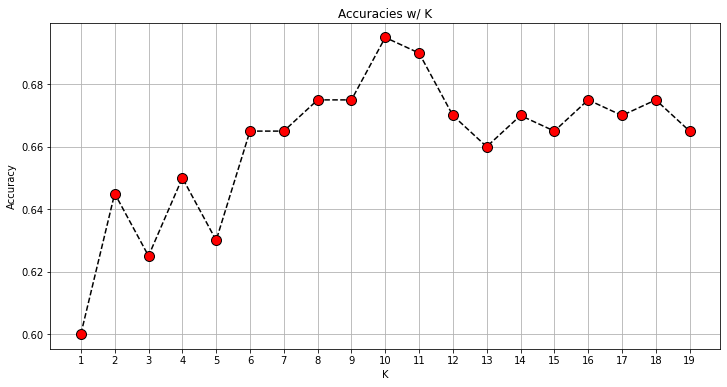

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

model1 = KNeighborsClassifier(best_kVal, metric = 'euclidean')
model2 = KNeighborsClassifier(best_kVal, metric = 'cityblock')
model3 = KNeighborsClassifier(best_kVal, metric = 'chebyshev')

model1.fit(train_df,train_label)
model2.fit(train_df,train_label)
model3.fit(train_df,train_label)

y_pred_test1 = model1.predict(test_df)
y_pred_test2 = model2.predict(test_df)
y_pred_test3 = model3.predict(test_df)
print('Accuracy of model 1 on test data :', accuracy_score(test_label, y_pred_test1))
print('Accuracy of model 2 on test data:', accuracy_score(test_label, y_pred_test2))
print('Accuracy of model 3 on test data:', accuracy_score(test_label, y_pred_test3))

#changing distance metrices did not affect accuracy scores

# Here, we used hyperparameter tuning for the hyperparameter k in kNN
# Maybe if we choose K different than other 3 values it can give higher accuracies lets check
K_range = np.arange(1, 20)
accuracy_list = []

for k in K_range:
  # create a new model with current K
  knn = KNeighborsClassifier(k, metric="cityblock") 
  # fit training data
  knn.fit(train_df, train_label)
  # predict the validation data
  y_pred = knn.predict(test_df)
  # obtain the accuracy value
  accuracy = accuracy_score(test_label, y_pred)
  accuracy_list.append(accuracy)

plt.figure(figsize=(12, 6))  
plt.plot(K_range, accuracy_list, color='black', linestyle='dashed', marker='o',  
         markerfacecolor='red', markersize=10)
plt.title('Accuracies w/ K')  
plt.xlabel('K')  
plt.ylabel('Accuracy')
plt.xticks(K_range)
plt.grid()
plt.show()
# As it can be seen choosing k equals 10 gives higher accuracy scores in test case


** choosing k = 10 gives higher accuracies in test prediction unlike training label prediction, I have obtained a little more than %68.5 accuraccy when using k = 10 it can be seen in the above graph. Without using it( using the k value 15) i got %66.5 accuracy. The reason i used k = 15 before because it was provided me the highest accuracy in train set.**

# 10) Notebook & Report

**Notebook:** We may just look at your notebook results; so make sure each cell is run and outputs are there.

**Report:** Write an at most 1/2 page summary of your approach to this problem at the end of your notebook; this should be like an abstract of a paper or the executive summary.

**Must include statements such as:**

( Include the problem definition: 1-2 lines )

(Talk about any preprocessing you do, How you handle missing values and categorical features)

( Give the average validation accuracies for different k values and standard deviations between 5 folds of each k values, state which one you selected)

( State what your test results are with the chosen method, parameters: e.g. "We have obtained the best results with the ….. classifier (parameters=....) , giving classification accuracy of …% on test data….""

State if there is any **bonus** work...

You will get full points from here as long as you have a good (enough) summary of your work, regardless of your best performance or what you have decided to talk about in the last few lines.

  Problem is to test labels using training set. As a method we use KNN classifier. To validate our result we used cross validation. To handle the missing values I used mode imputation. Then i mapped the categorical features into numbers so that model can perform as it is supposed to. Avarage validation accuracies for cv = 5 for k = 5 is %68, for k = 10 it is %70.7499 and for k = 15 accuracy score was %71.001. Therefore i selected k = 15 for the best_knn model. And because k = 15 gave me the best result in training set, i also used k = 15 to predict test labels. When i used k = 15 i got %66.5 accuracy score on test label. As bonus work i tried to use different distance metrices in KNN but it did not change the overall accuracy.Then from 1 to 20 i tried different k values while predicting my test label. As a result i have seen that k = 10 provided me the best accuracy in predicting test label unlike the cross validation accuracies in part 7) which is a little above %68.5. Also in part 3) i used some methods to find more about datasets like df.describe().

# 11) Submission

Please submit your **"share link" INLINE in Sucourse submissions**. That is we should be able to click on the link and go there and run (and possibly also modify) your code. 

For us to be able to modify, in case of errors etc, **you should get your "share link" as **share with anyone in edit mode** 

 **Also submit your notebook as pdf as attachment**, choose print and save as PDF, save with hw2-lastname-firstname.pdf to facilitate grading. 
